In [20]:
# Loading dataset
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

Exploratory data analysis
- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data

In [21]:
# reading data into dataframe
df1 = pd.read_csv('C:/Users/Elechiguerra/Documents/GitHub/technical_challenge_DA/data/measurements.csv')
df1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [22]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [23]:
df2 = pd.read_excel('C:/Users/Elechiguerra/Documents/GitHub/technical_challenge_DA/data/measurements2.xlsx')
df2.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [24]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [25]:
nRow, nCol= df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 776 rows and 12 columns


In [26]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [27]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,776.000000,776.000000,776.00000,776.000000,776.000000
mean,41.927835,11.358247,0.07732,0.123711,0.082474
std,13.589747,6.987030,0.26727,0.329464,0.275263
min,14.000000,-5.000000,0.00000,0.000000,0.000000
25%,32.750000,7.000000,0.00000,0.000000,0.000000
50%,40.500000,10.000000,0.00000,0.000000,0.000000
75%,50.000000,16.000000,0.00000,0.000000,0.000000
max,90.000000,31.000000,1.00000,1.000000,1.000000


In [28]:
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       776 non-null    object
 1   consume        776 non-null    object
 2   speed          776 non-null    int64 
 3   temp_inside    752 non-null    object
 4   temp_outside   776 non-null    int64 
 5   specials       186 non-null    object
 6   gas_type       776 non-null    object
 7   AC             776 non-null    int64 
 8   rain           776 non-null    int64 
 9   sun            776 non-null    int64 
 10  refill liters  26 non-null     object
 11  refill gas     26 non-null     object
dtypes: int64(5), object(7)
memory usage: 72.9+ KB


In [30]:
df.nunique()

distance         348
consume           86
speed             60
temp_inside       26
temp_outside      33
specials          12
gas_type           2
AC                 2
rain               2
sun                2
refill liters     20
refill gas         2
dtype: int64

In [31]:
# Finding the total number of missing values in the dataframe
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       24
temp_outside       0
specials         590
gas_type           0
AC                 0
rain               0
sun                0
refill liters    750
refill gas       750
dtype: int64

In [41]:
for col in ['distance', 'consume', 'temp_inside', 'refill liters', 'refill gas']:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in distance: [ 28.   12.   11.2  12.9  18.5   8.3   7.8  12.3   4.9  11.9  12.4  11.8
  24.7  17.3  33.4  25.9  25.3  14.2  17.9  18.4  18.3  32.6  19.   12.1
  20.    4.5  11.7  10.2   5.4   2.   16.   27.3  10.6  11.6  13.1   6.1
 153.5   2.9   2.1   9.8   6.8  14.   13.9   9.7  24.8  34.8   5.2  10.5
  13.2  13.   12.2  12.5  15.7   6.4   5.3  26.2  18.8  22.9 162.7  16.6
  15.9   5.1  22.4  31.1  16.1   4.2  17.4  23.5   7.   20.1  20.8   1.7
  35.9  36.9  16.8   9.9  36.6  44.9  21.6  39.4  26.6  53.2  18.9  43.5
  16.4  21.1  22.7  44.4  35.8  40.6  14.1  58.7  16.2  31.8  51.6  38.6
  81.2 130.3  67.2  43.7  56.1  39.   38.5  28.2  19.6  22.2  13.6  12.6
   8.7   7.9   2.4  18.1   1.3  13.4  12.8  29.   31.4  27.1  25.2  14.3
  16.9   9.2  31.5  24.9  17.    7.4  25.7  24.5   4.1  15.4 101.9  93.9
  32.1  48.6  37.2  28.8   6.7   6.6  13.3  12.7  16.5  20.6  16.3  18.7
  36.5  29.9  10.1  31.9  10.8  19.8  11.3  11.5  21.4  32.   41.9 211.
 216.1  25.5  22.1  39.5 

In [42]:
df = df.fillna(method='ffill')

C:\Users\Elechiguerra\AppData\Local\Temp\ipykernel_14864\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [44]:
numeric_df = df.select_dtypes(include=[np.number])

 Visualization


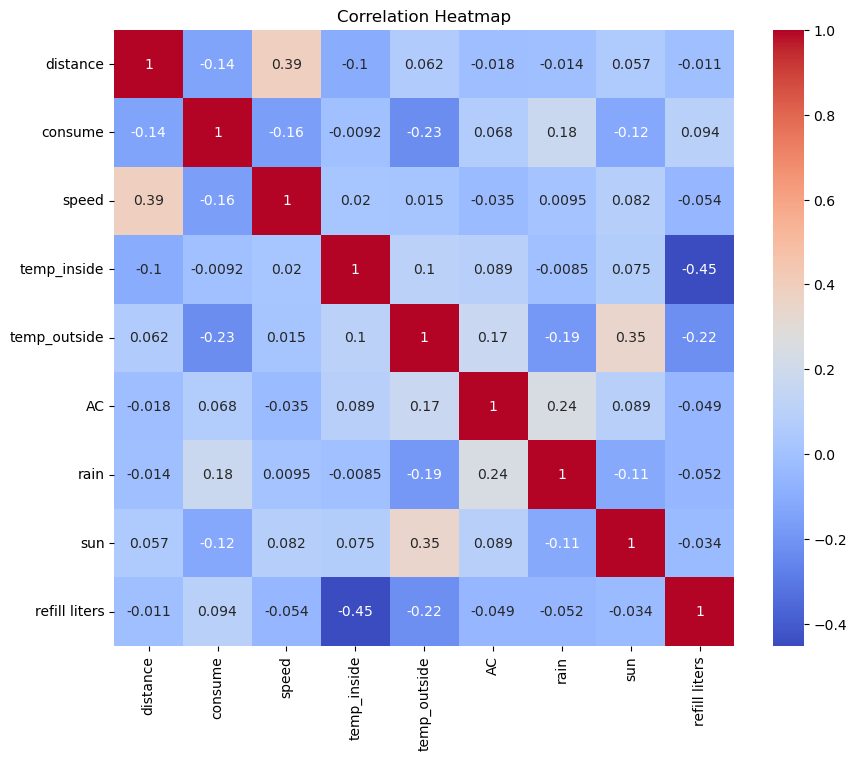

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Predictions

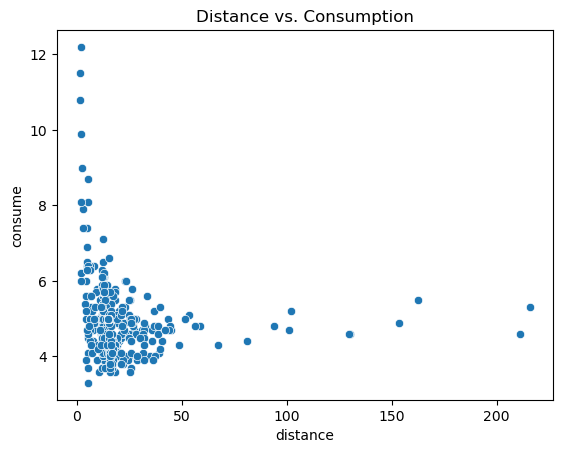

In [56]:
# Distance vs. Consumption
sns.scatterplot(x='distance', y='consume', data=df)
plt.title('Distance vs. Consumption')
plt.show()

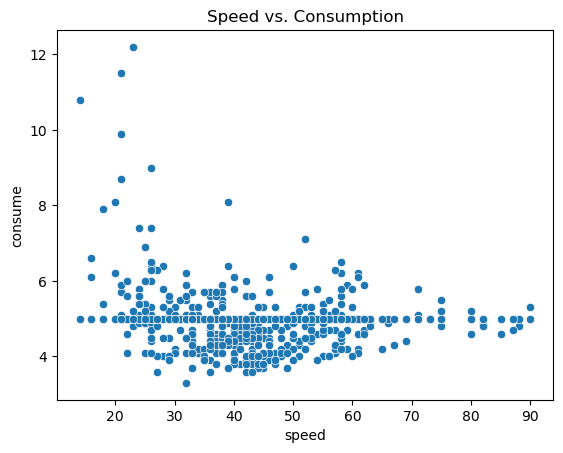

In [57]:
# Speed vs. Consumption
sns.scatterplot(x='speed', y='consume', data=df)
plt.title('Speed vs. Consumption')
plt.show()


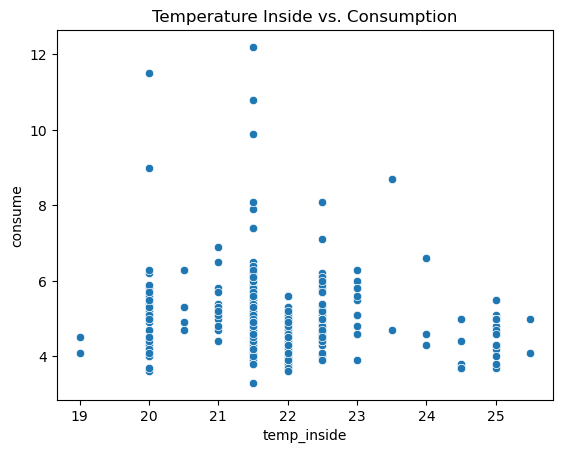

In [58]:
# Temperature Inside vs. Consumption
sns.scatterplot(x='temp_inside', y='consume', data=df)
plt.title('Temperature Inside vs. Consumption')
plt.show()


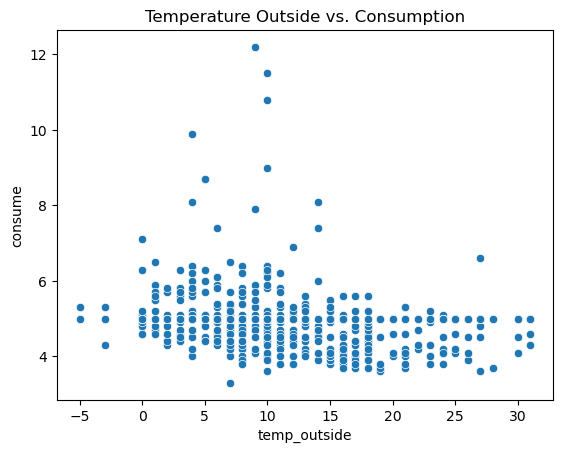

In [59]:
# Temperature Outside vs. Consumption
sns.scatterplot(x='temp_outside', y='consume', data=df)
plt.title('Temperature Outside vs. Consumption')
plt.show()


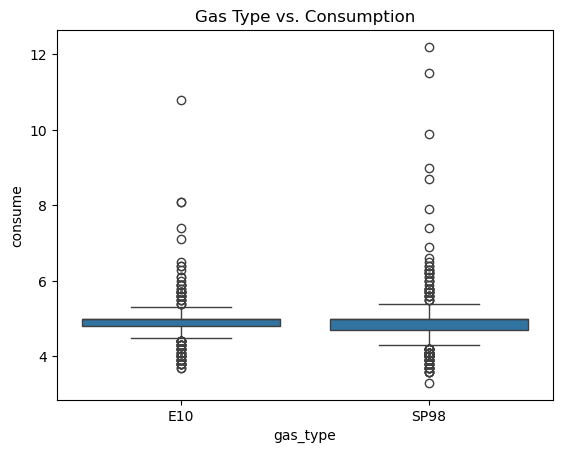

In [60]:
# Gas Type vs. Consumption
sns.boxplot(x='gas_type', y='consume', data=df)
plt.title('Gas Type vs. Consumption')
plt.show()


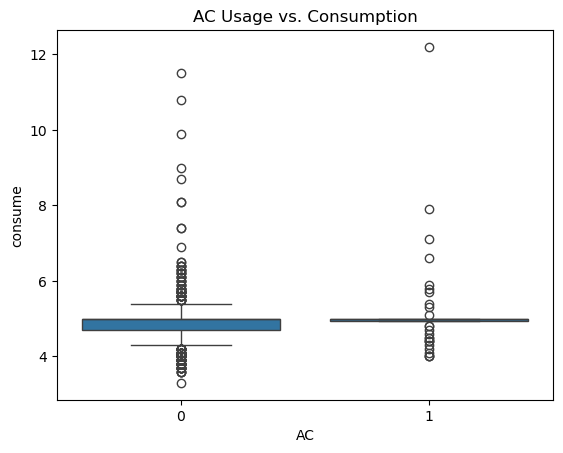

In [61]:
# AC Usage vs. Consumption
sns.boxplot(x='AC', y='consume', data=df)
plt.title('AC Usage vs. Consumption')
plt.show()


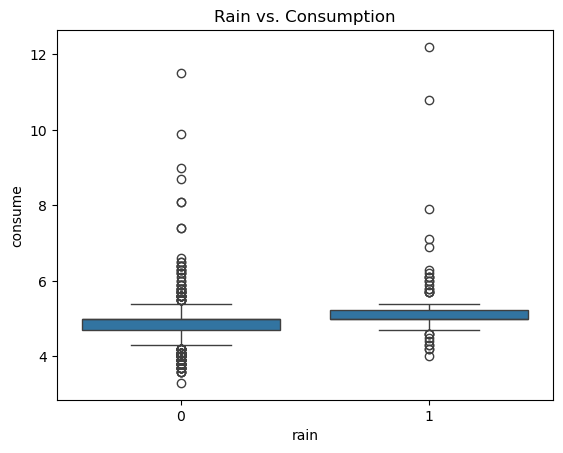

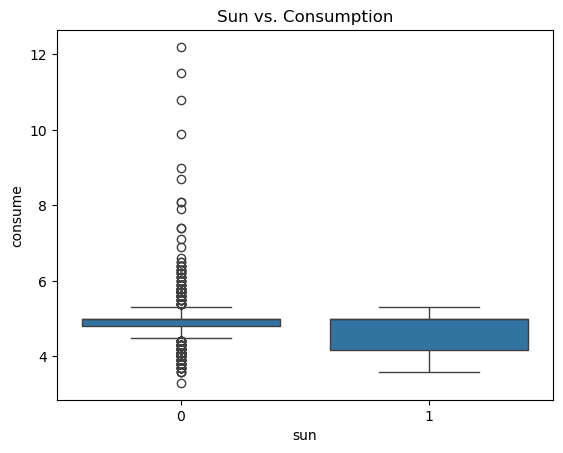

In [63]:
# Weather Conditions vs. Consumption
sns.boxplot(x='rain', y='consume', data=df)
plt.title('Rain vs. Consumption')
plt.show()

sns.boxplot(x='sun', y='consume', data=df)
plt.title('Sun vs. Consumption')
plt.show()


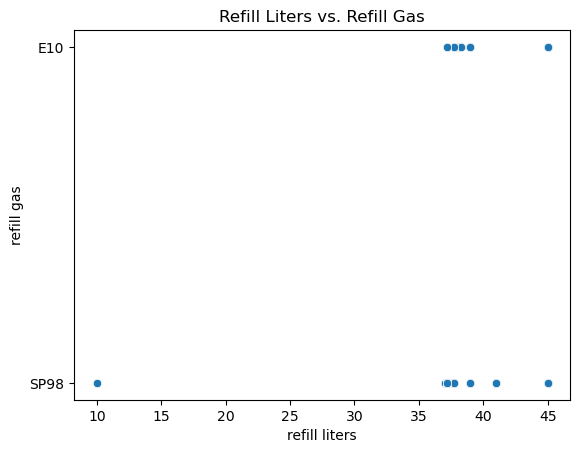

In [66]:
# Analyze Refills
sns.scatterplot(x='refill liters', y='refill gas', data=df)
plt.title('Refill Liters vs. Refill Gas')
plt.show()


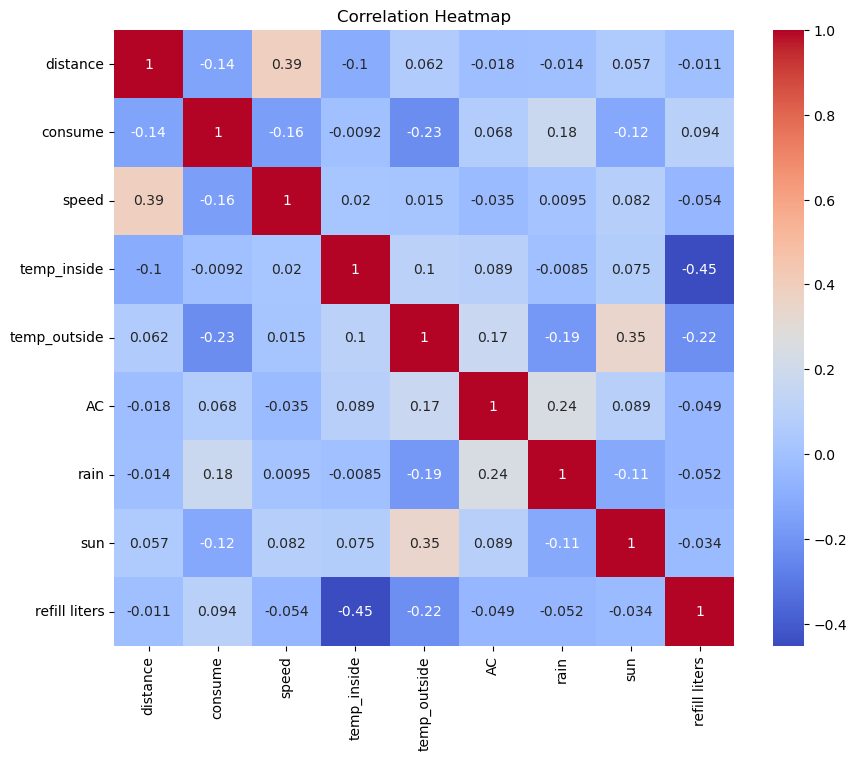

Top Correlations:
distance      distance         1.000000
speed         distance         0.392931
temp_outside  sun              0.346903
AC            rain             0.242915
rain          consume          0.175130
temp_outside  AC               0.167562
temp_inside   temp_outside     0.104601
consume       refill liters    0.093991
AC            temp_inside      0.089264
sun           AC               0.088598
dtype: float64


"\n1. **Distance and Consumption**: If there's a high positive correlation, it indicates that longer distances are associated with higher fuel consumption.\n2. **Speed and Consumption**: A high positive correlation would suggest that higher speeds lead to higher fuel consumption.\n3. **Temperature Inside and Consumption**: This relationship can indicate the impact of the HVAC system on fuel consumption.\n4. **Refill Liters and Refill Gas**: If these two show a strong correlation, it indicates consistency in refueling patterns.\n\nThe Pearson correlation coefficients indicate the strength and direction of linear relationships between the variables. Values closer to +1 or -1 indicate stronger relationships, while values closer to 0 suggest weaker relationships.\n"

In [70]:
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analyze relationships
correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Top Correlations:")
print(correlations.head(10))  # Display the top 10 correlations for quick insight

# Detailed Insights
"""
1. **Distance and Consumption**: If there's a high positive correlation, it indicates that longer distances are associated with higher fuel consumption.
2. **Speed and Consumption**: A high positive correlation would suggest that higher speeds lead to higher fuel consumption.
3. **Temperature Inside and Consumption**: This relationship can indicate the impact of the HVAC system on fuel consumption.
4. **Refill Liters and Refill Gas**: If these two show a strong correlation, it indicates consistency in refueling patterns.

The Pearson correlation coefficients indicate the strength and direction of linear relationships between the variables. Values closer to +1 or -1 indicate stronger relationships, while values closer to 0 suggest weaker relationships.
"""
